In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns

In [4]:
from spaceoracle.models.estimators import GCNNWR 
from spaceoracle.tools.data import load_example_slideseq, filter_adata
from spaceoracle.tools.network import GeneRegulatoryNetwork

which: no R in (/ihome/crc/install/cuda/11.8/bin:/ihome/crc/install/pytorch/2.0.1/python3.10/bin:/ihome/ylee/kor11/miniforge3/condabin:/ihome/ylee/kor11/.cargo/bin:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/ihome/crc/pipx/bin:/ihome/ylee/kor11/.npm/bin:/ihome/ylee/kor11/.local/bin:/ihome/ylee/kor11/bin)


In [5]:
slideseq_data = load_example_slideseq('../data/slideseq/')
slideseq_data

[AnnData object with n_obs × n_vars = 50058 × 19041
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 41361 × 18972
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 30242 × 25343
     obs: 'cluster'
     obsm: 'X_spatial', 'spatial',
 AnnData object with n_obs × n_vars = 39721 × 24649
     obs: 'cluster'
     uns: 'cluster_colors'
     obsm: 'X_spatial', 'spatial']

In [110]:
adata = slideseq_data[3].copy()

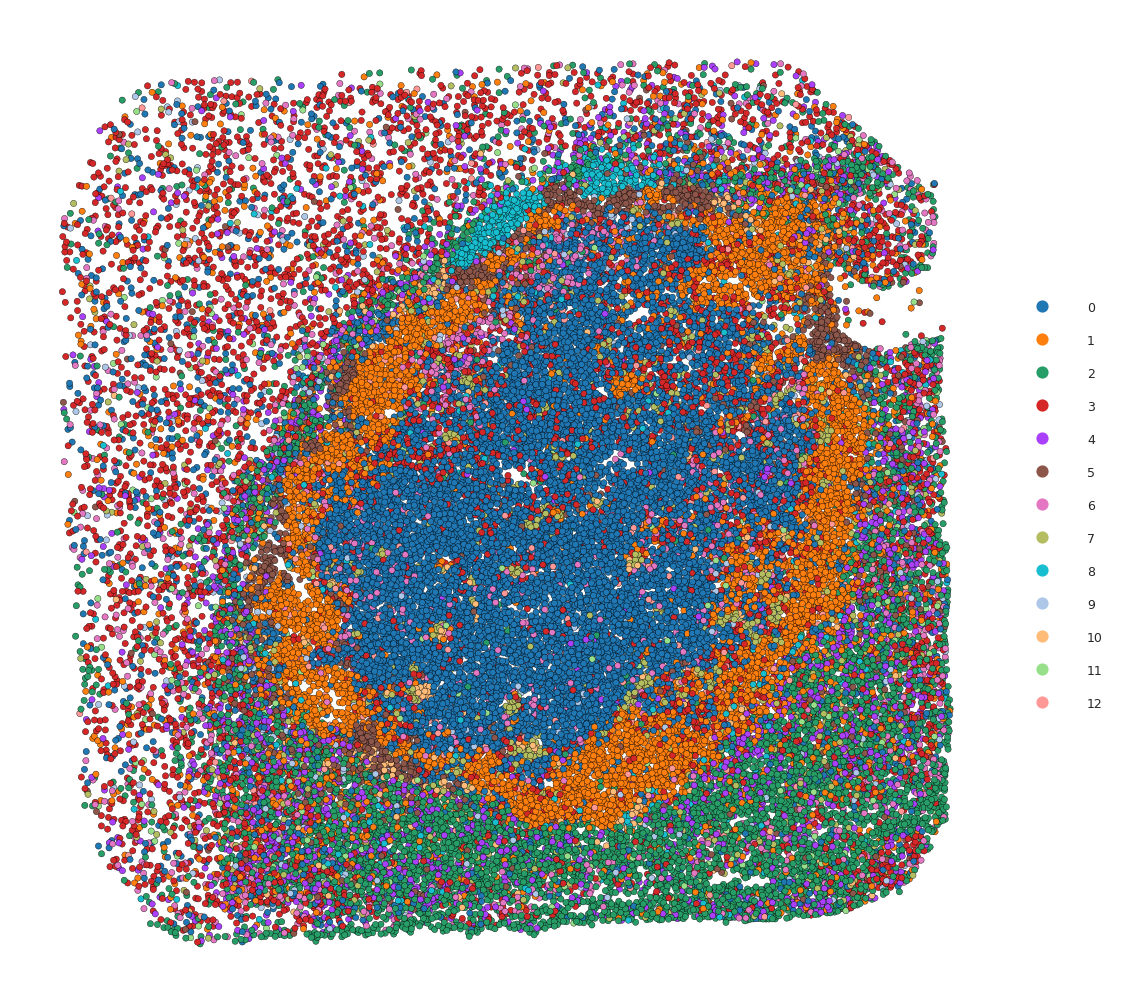

In [101]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color='cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15)

fig = plt.gcf()
ax = plt.gca()

# Adjust the legend size
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_fontsize(5)

for handle in legend.legendHandles:
    handle._sizes = [15]

plt.title('')
plt.axis('off')
plt.show()

In [102]:
adata.shape

(39721, 24649)

In [111]:
adata = filter_adata(adata, min_counts=500)

In [112]:
adata

View of AnnData object with n_obs × n_vars = 9984 × 2000
    obs: 'cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'log1p', 'hvg'
    obsm: 'X_spatial', 'spatial'
    layers: 'raw_count'

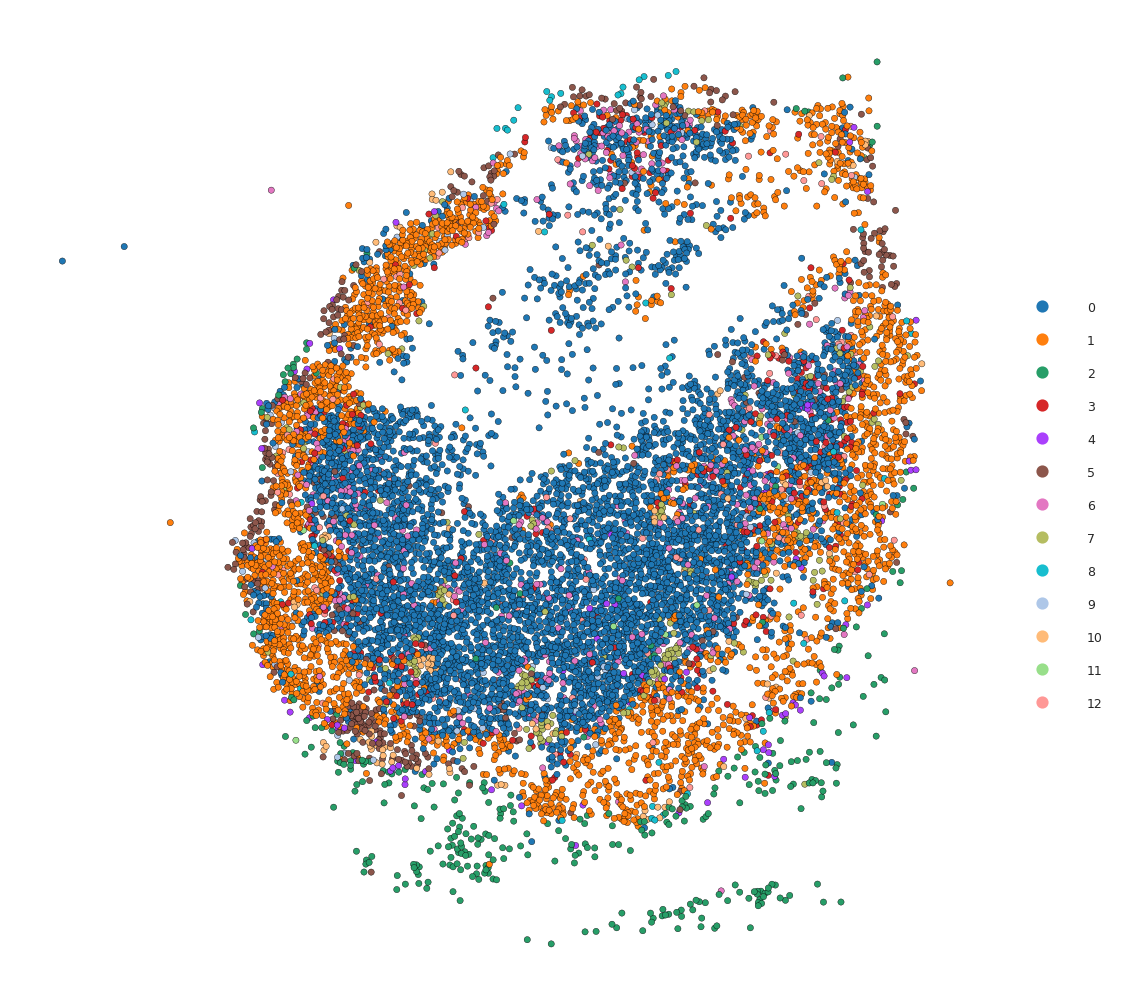

In [113]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color='cluster', basis="spatial", s=25, show=False, edgecolor='black', linewidth=0.15)

fig = plt.gcf()
ax = plt.gca()

# Adjust the legend size
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_fontsize(5)

for handle in legend.legendHandles:
    handle._sizes = [15]

plt.title('')
plt.axis('off')
plt.show()

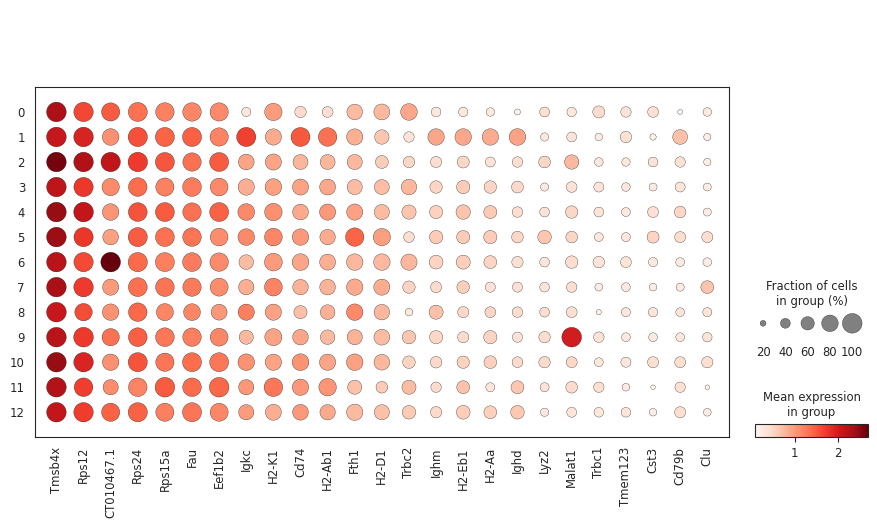

In [114]:
plt.rcParams["figure.figsize"] = (1, 1)
plt.rcParams['figure.dpi'] = 100
sc.pl.dotplot(adata, var_names=adata.var.means.sort_values(ascending=False)[:25].index, groupby='cluster')

In [115]:
adata.var.means.sort_values(ascending=False)[:15]

Tmsb4x        2.314449
Rps12         1.864198
CT010467.1    1.704301
Rps24         1.542029
Rps15a        1.416875
Fau           1.389121
Eef1b2        1.290448
Igkc          1.219202
H2-K1         1.121229
Cd74          1.079870
H2-Ab1        0.988318
Fth1          0.970740
H2-D1         0.875278
Trbc2         0.866577
Ighm          0.756234
Name: means, dtype: float64

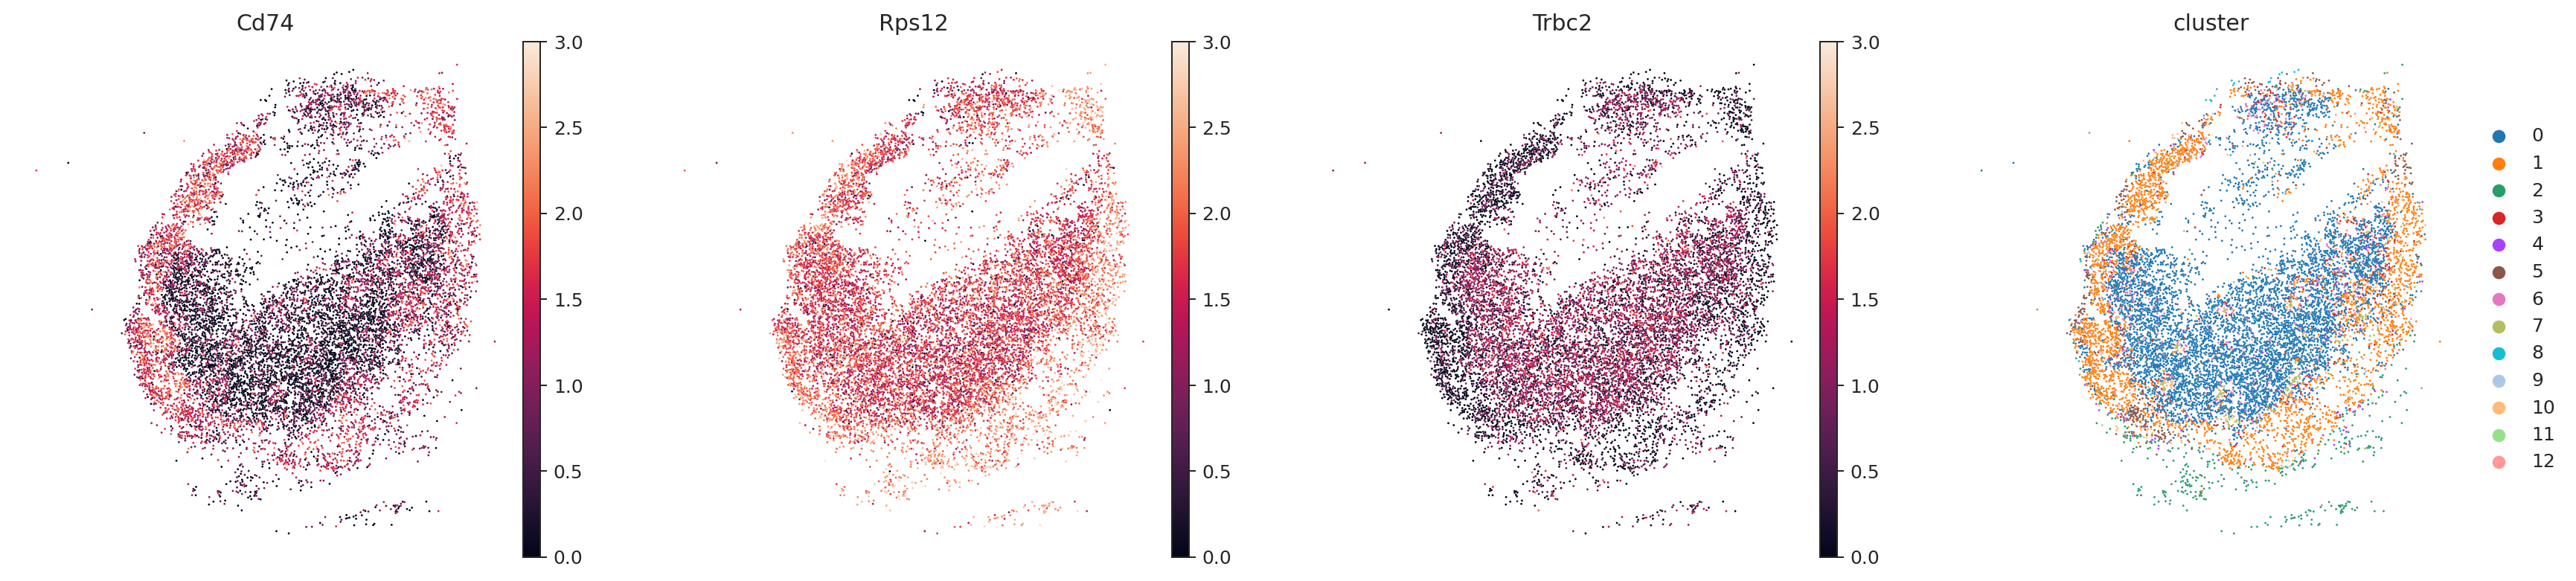

In [118]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 180
sc.pl.embedding(adata, color=['Cd74', 'Rps12', 'Trbc2', 'cluster'], 
                frameon=False, basis="spatial", s=5, show=False, vmin=0, vmax=3)
plt.axis('off')
plt.show()

In [119]:
grn = GeneRegulatoryNetwork()

In [120]:
target_gene = 'Rps12'

In [123]:
regulators = grn.get_regulators(adata, target_gene=target_gene)
regulators, len(regulators)

(['Arntl2',
  'Atf3',
  'Bach1',
  'Batf3',
  'Bcl11a',
  'Bhlhe41',
  'Creb3l2',
  'Ebf1',
  'Egr2',
  'Erg',
  'Etv6',
  'Gata1',
  'Gata2',
  'Heyl',
  'Id2',
  'Pax5',
  'Taf1',
  'Tfe3',
  'Tfec',
  'Xbp1'],
 20)

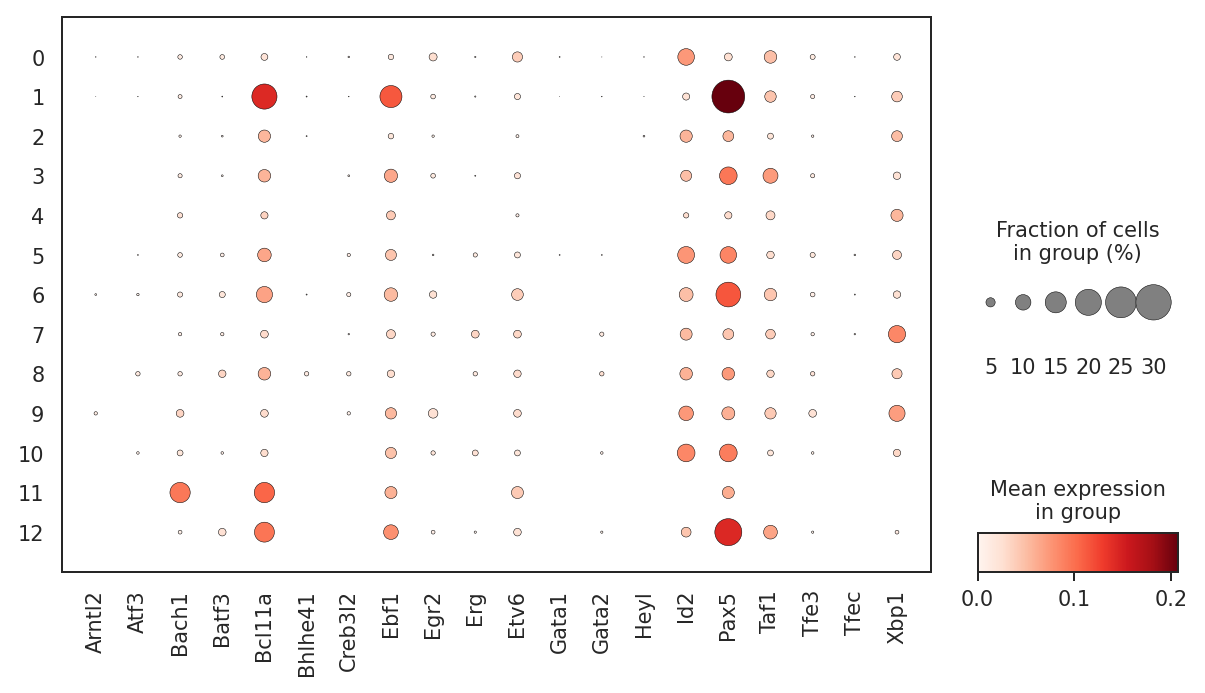

In [124]:
%matplotlib inline
sc.pl.dotplot(adata, var_names=regulators, groupby='cluster', figsize=(8, 4))

In [125]:
from spaceoracle.models.estimators import GeoCNNEstimator

In [126]:
estimator = GeoCNNEstimator()

In [127]:
X = adata.to_df()[regulators]
X

Arntl2  Atf3  Bach1  Batf3  Bcl11a  Bhlhe41  Creb3l2  \
AAAAATCGCGTCCA     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
AAAACCTCACATTT     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
AAAACGTGATCCTA     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
AAAACTATTTAAGG     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
AAAAGATGCTCAGC     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
...                ...   ...    ...    ...     ...      ...      ...   
TTTTTTCGACAGAG     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
TTTTTTCGCGGCTA     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
TTTTTTGGGCTGGT     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
TTTTTTGTACGATT     0.0   0.0    0.0    0.0     0.0      0.0      0.0   
TTTTTTGTTTTCTA     0.0   0.0    0.0    0.0     0.0      0.0      0.0   

                    Ebf1  Egr2  Erg      Etv6  Gata1  Gata2  Heyl       Id2  \
AAAAATCGCGTCCA  0.643342   0.0  0.0  0.000000    0.0    0.0   0.0  0.000000   
AAAACCTCACATTT  0.000000   0.0  0.0  0.000000    0.0    0.0   0.0  0.000000   
AAAACGTGATCCTA  0.000000   0.0  0.0  0.691110    0.0    0.0   0.0  0.000000   
AAAACTATTTAAGG  0.000000   0.0  0.0  0.000000    0.0    0.0   0.0  0.000000   
AAAAGATGCTCAGC  0.000000   0.0  0.0  1.211979    0.0    0.0   0.0  0.779354   
...                  ...   ...  ...       ...    ...    ...   ...       ...   
TTTTTTCGACAGAG  0.000000   0.0  0.0  0.000000    0.0    0.0   0.0  1.035613   
TTTTTTCGCGGCTA  0.000000   0.0  0.0  0.000000    0.0    0.0   0.0  0.000000   
TTTTTTGGGCTGGT  0.000000   0.0  0.0  0.720818    0.0    0.0   0.0  0.423997   
TTTTTTGTACGATT  0.000000   0.0  0.0  0.000000    0.0    0.0   0.0  0.000000   
TTTTTTGTTTTCTA  0.000000   0.0  0.0  0.000000    0.0    0.0   0.0  0.000000   

                Pax5      Taf1  Tfe3  Tfec  Xbp1  
AAAAATCGCGTCCA   0.0  0.000000   0.0   0.0   0.0  
AAAACCTCACATTT   0.0  0.000000   0.0   0.0   0.0  
AAAACGTGATCCTA   0.0  0.000000   0.0   0.0   0.0  
AAAACTATTTAAGG   0.0  0.000000   0.0   0.0   0.0  
AAAAGATGCTCAGC   0.0  0.000000   0.0   0.0   0.0  
...              ...       ...   ...   ...   ...  
TTTTTTCGACAGAG   0.0  0.646273   0.0   0.0   0.0  
TTTTTTCGCGGCTA   0.0  0.000000   0.0   0.0   0.0  
TTTTTTGGGCTGGT   0.0  0.000000   0.0   0.0   0.0  
TTTTTTGTACGATT   0.0  0.000000   0.0   0.0   0.0  
TTTTTTGTTTTCTA   0.0  0.000000   0.0   0.0   0.0  

[9984 rows x 20 columns]

In [128]:
y = adata.to_df()[[target_gene]]
y

Rps12
AAAAATCGCGTCCA  2.106890
AAAACCTCACATTT  1.502402
AAAACGTGATCCTA  2.481168
AAAACTATTTAAGG  0.857282
AAAAGATGCTCAGC  0.779354
...                  ...
TTTTTTCGACAGAG  1.533348
TTTTTTCGCGGCTA  2.096312
TTTTTTGGGCTGGT  1.749638
TTTTTTGTACGATT  1.311973
TTTTTTGTTTTCTA  1.187692

[9984 rows x 1 columns]

In [129]:
xy = adata.obsm['spatial']
xy

ArrayView([[-2583.5,  2490.7],
           [-3975.2,  2855.4],
           [-1578.6,  2046. ],
           ...,
           [-3547.4,  2483.1],
           [-2052.1,  2937.7],
           [-2025.5,  2342.3]])

In [131]:
estimator.fit(X.values, y.values, xy, init_betas='ols', max_epochs=600, learning_rate=3e-4, spatial_dim=128)

MSE: 0.2129 | OLS: 0.2703: 100%|██████████| 600/600 [14:27<00:00,  1.45s/it]


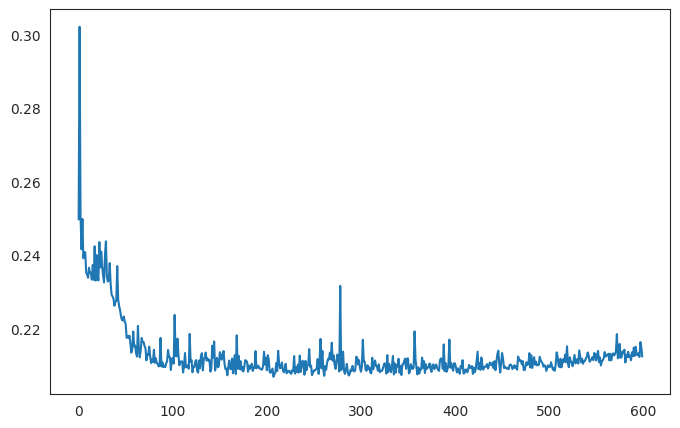

In [132]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams['figure.dpi'] = 100
plt.plot(estimator.losses)
plt.show()

In [133]:
betas, y_pred = estimator.get_betas(X[:].values, xy[:])

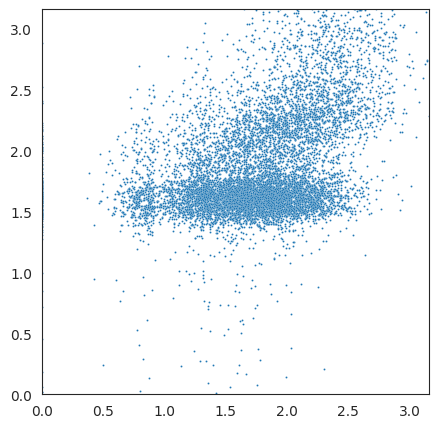

In [134]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 100
sns.scatterplot(x=y.values.reshape(-1), y=y_pred.reshape(-1), s=2)
plt.xlim(y.values.min(), y.values.max())
plt.ylim(y.values.min(), y.values.max())
plt.show()

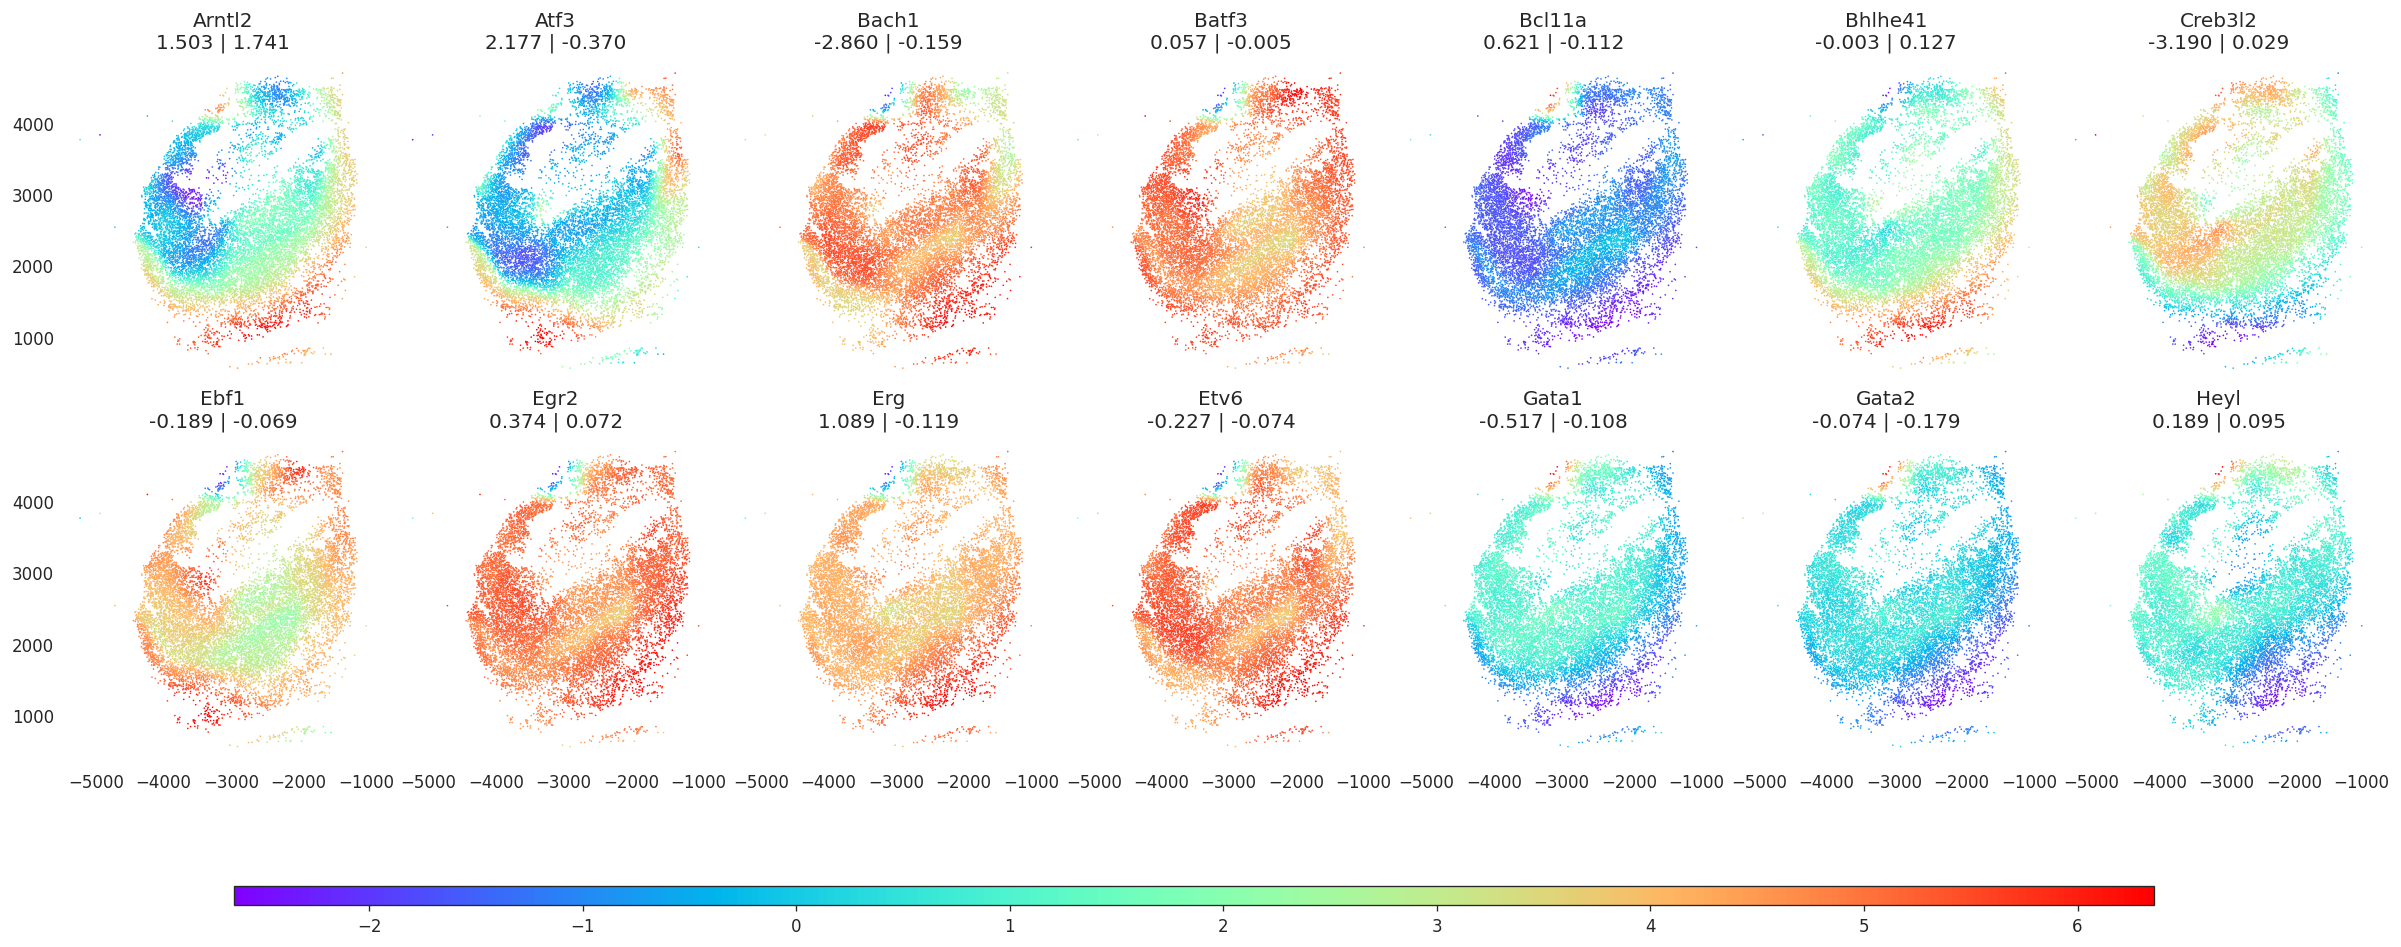

In [135]:
f, axs = plt.subplots(2, 7, figsize=(20, 8), dpi=120, sharex=True, sharey=True)
axs = axs.flatten()

scatter_plots = []

for i in range(len(axs)): 
    scatter = sns.scatterplot(x=adata.obsm['spatial'][:, 0][:], y=adata.obsm['spatial'][:][:, 1], 
                s=1, c=betas[:, i+1], cmap='rainbow', ax=axs[i], edgecolor=None, linewidth=0)
    scatter_plots.append(scatter)

beta_means = list(betas.mean(0))
for ix, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'{regulators[ix]}\n{beta_means[ix+1]:.3f} | {estimator.beta_init[ix]:.3f}')

# Adjust the layout to make space for the colorbar
plt.tight_layout()
f.subplots_adjust(bottom=0.2)

# Add a colorbar
cbar_ax = f.add_axes([0.1, 0.05, 0.8, 0.02])
colorbar = f.colorbar(scatter_plots[0].collections[0], cax=cbar_ax, orientation='horizontal')

plt.show()